<a href="https://colab.research.google.com/github/Mohamad-Selawy/Face-Recognition-System/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DI'] = '/content'

# !mv /content/kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d hereisburak/pins-face-recognition
# !unzip \*.zip && rm *.zip
# ! cp -r /content/105_classes_pins_dataset /content/drive/MyDrive

#**VGG** (Visual Geometry Group) model, a type of convolutional neural network (CNN) that is often used for image classification tasks.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib as mpl
'''######################## Create CNN deep learning model ########################'''
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Dropout
from keras.layers import Dense, Flatten, Activation
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import cv2
from keras.layers import Flatten, Dense, Input,concatenate
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout
from keras.models import Model
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

In [ ]:
path = '/content/drive/MyDrive/105_classes_pins_dataset'

**This code sets up data generators for image data, likely for training a machine learning model.**

- `ImageDataGenerator` is used to preprocess the image data.
- `rescale=1.0/255` normalizes pixel values to the range [0,1].
- `validation_split=0.2` specifies that 20% of the data will be used for validation.
- `rotation_range`, `zoom_range`, `width_shift_range`, `height_shift_range`, `shear_range`, `horizontal_flip`, `fill_mode` are data augmentation parameters applied only to the training data to increase model generalization.

**1.shear_range:**


    •	Description: Shear transformation applies a shear intensity to the image. Shearing essentially skews the image along one axis, which can help the model become invariant to shearing distortions.
    •	Value in Code: shear_range=0.2
    •	Effect: Images will be sheared by up to 20% of the angle.

**2.horizontal_flip:**


    •	Description: This parameter randomly flips the images horizontally. Horizontal flipping can help the model learn features regardless of their horizontal orientation.
    •	Value in Code: horizontal_flip=True
    •	Effect: Images will be randomly flipped horizontally during training.

**3.fill_mode:**

    •	Description: This parameter determines how newly created pixels are filled when an image is transformed (e.g., rotated or shifted). The fill_mode is applied to any transformation that might result in newly exposed pixels, such as rotation or shifts.
    •	Value in Code: fill_mode="nearest"
    •	Effect: Newly created pixels are filled with the nearest pixel value. This avoids introducing new pixel values and keeps the transformation seamless.


The **`class_mode='categorical'`** parameter indicates that the labels are provided as categorical labels (e.g., one-hot encoded).


The **`ImageDataGenerator`** itself does not add or duplicate images in the dataset; instead, it generates augmented versions of the images on the fly during training. This means that the size of the dataset remains the same, but the model sees different, augmented versions of the images in each epoch.

**Key Points:**

1. **No Increase in Dataset Size**: The number of images in your dataset remains the same. If you have 1,000 images, you will still have 1,000 images stored on disk.

2. **Dynamic Augmentation**: During training, `ImageDataGenerator` creates augmented images in real-time. This means each epoch may present different variations of the original images to the model.

3. **Effective Dataset Size**: Although the physical size of the dataset does not change, the effective dataset size is much larger. This is because the model sees numerous variations of each image over the course of training, improving generalization.

**Example Workflow:**

1. **Original Dataset**: Suppose you have 17,534 images.
2. **Batch Size**: Assume a batch size of 64.
3. **Epochs**: You train for 500 epochs.

**For Train Set**

>-Each epoch consists of 14,080 / 64 ≈ 220 steps (batches).

>-In each step, the `ImageDataGenerator` produces 14,080 augmented images.

>-Over 500 epochs, the model will see 14,080 * 500 = 7,040,000 augmented images (though not all will be unique).

**Conclusion:**

The `ImageDataGenerator` doesn't add more images to the dataset on disk. Instead, it enhances the training process by providing different augmented versions of the existing images in each epoch, helping the model generalize better without needing more storage space.

In [ ]:
import os
import shutil

# Specify the number of classes you want to include
num_classes = 10

# Paths
original_dataset_path = path
new_dataset_path = '/content/drive/MyDrive/subset'

# Create the new dataset directory if it doesn't exist
if not os.path.exists(new_dataset_path):
    os.makedirs(new_dataset_path)

# Get the list of all class directories
all_classes = sorted(os.listdir(original_dataset_path))[:num_classes]

# Copy the specified number of classes to the new dataset directory
for cls in all_classes:
    original_class_path = os.path.join(original_dataset_path, cls)
    new_class_path = os.path.join(new_dataset_path, cls)

    # Create the class directory in the new dataset path
    if not os.path.exists(new_class_path):
        os.makedirs(new_class_path)

    # Copy all files from the original class directory to the new class directory
    for filename in os.listdir(original_class_path):
        src_file = os.path.join(original_class_path, filename)
        dst_file = os.path.join(new_class_path, filename)
        shutil.copyfile(src_file, dst_file)

print(f"New dataset directory created successfully with the top {num_classes} classes.")

New dataset directory created successfully with the top 10 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                rotation_range=40,
                                zoom_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                horizontal_flip=True,
                                fill_mode="nearest",
                                validation_split=0.2
                                )

train_data = train_datagen.flow_from_directory(new_dataset_path,
                                               target_size=[224,224],
                                               batch_size=64,
                                               class_mode='categorical',
                                               subset='training')
test_data = test_datagen.flow_from_directory(new_dataset_path,
                                               target_size=[224,224],
                                               batch_size=64,
                                               class_mode='categorical',
                                               subset='validation')

Found 1442 images belonging to 10 classes.
Found 356 images belonging to 10 classes.


In [ ]:
train_data.class_indices

{'pins_Alexandra Daddario': 0,
 'pins_Anne Hathaway': 1,
 'pins_Ben Affleck': 2,
 'pins_Brenton Thwaites': 3,
 'pins_Dominic Purcell': 4,
 'pins_Gwyneth Paltrow': 5,
 'pins_Henry Cavil': 6,
 'pins_Irina Shayk': 7,
 'pins_Jason Momoa': 8,
 'pins_Jeremy Renner': 9}

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

**include_top, in the VGG16 function specifies whether to include the fully connected layers at the top of the network.**

In [ ]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
vgg.summary()



58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

**Setting Layers to Non-Trainable:**
layer.trainable = False
Sets the trainable attribute of each layer to False.

**•	trainable Attribute:** This attribute determines whether the weights of the layer should be updated during training. When set to False, the weights of the layer are frozen, meaning they will not be modified during the training process.

**Purpose of Freezing Layers**

**•	Transfer Learning:** By freezing the layers, you preserve the learned features from the original model, which were trained on a large and diverse dataset.

**•	Feature Extraction:** In many applications, the early and middle layers of CNNs like VGG capture generic features such as edges, textures, and shapes, which are useful for various tasks. By freezing these layers, you retain these useful features.

**•	Efficiency:** Freezing layers reduces the number of parameters that need to be updated, which can make training faster and require less computational resources.


In [ ]:
for layer in vgg.layers:
    layer.trainable=False

**vgg.input : refers to the input tensor of the VGG16 model. It represents the placeholder for the input data, specifying the shape and data type expected by the model. In this case, with input_shape=(224,224,3)**

In [ ]:
from keras.models import Model
x = Flatten()(vgg.output)
x = Dense(512,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(2048,activation='relu')(x)
x = Dense(4096,activation='relu')(x)

prediction = Dense(10,activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**1.	EarlyStopping Callback:**
  
    • Purpose: Stops training early if the model’s performance on the validation set does not improve.
    •	patience: Number of epochs to wait for an improvement before stopping. Here, it’s set to 10.
    •	monitor: The metric to monitor for improvements. Here, it’s 'val_accuracy' (validation accuracy).

**2.ReduceLROnPlateau Callback:**

    • Purpose: Reduces the learning rate when a monitored metric has stopped improving.
    •	monitor: The metric to monitor. Here, it’s 'val_accuracy'.
    •	factor: Factor by which the learning rate will be reduced. Here, it’s 0.2, meaning the learning rate will be reduced to 20% of its current value.
    •	patience: Number of epochs with no improvement after which learning rate will be reduced. Here, it’s set to 10.
    •	min_lr: The lower bound on the learning rate. Here, it’s 0.001.

**3.ModelCheckpoint Callback:**

	3.•Purpose: Saves the model or weights during training. This is useful for checkpointing the model to prevent loss of training progress.
	•	filepath: The path where the model weights will be saved. Here, it’s 'weights_vgg.hdf5'.
	•	save_weights_only: If True, only the model weights will be saved (not the entire model architecture). Here, it is set to True.
	•	monitor: The metric to monitor. Here, it’s 'val_accuracy'.
	•	save_best_only: If True, only the best model (as measured by the monitored metric) will be saved. Here, it is set to True.


In [ ]:
callbacks = EarlyStopping(patience = 10, monitor='val_accuracy')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=10, min_lr=0.001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights_vgg.hdf5',
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

1. **`history=model.fit(...)`**:
   - This line initiates the training process for the model and stores the training history in the `history` variable. The training history contains information about the loss and metrics for each epoch.

2. **`verbose=1`**:
   - Controls the verbosity mode. `1` means progress bars will be shown during training, giving information about the training progress.

3. **`steps_per_epoch=len(train_data)`**:
   - Specifies the total number of steps (batches of samples) to draw from the training generator at each epoch. `len(train_data)` gives the number of batches in the training data.

4. **`validation_steps=len(test_data)`**:
   - Specifies the total number of steps (batches of samples) to draw from the validation generator at each epoch. `len(test_data)` gives the number of batches in the validation data.


In [ ]:
history=model.fit(train_data,
                           validation_data=test_data,
                           epochs=500,
                           verbose =1,
                           steps_per_epoch=len(train_data),
                           validation_steps=len(test_data),
                 callbacks=[callbacks,reduce_lr,model_checkpoint_callback])

Epoch 1/500
23/23 [==============================] - 54s 2s/step - loss: 2.6409 - accuracy: 0.1581 - val_loss: 1.8707 - val_accuracy: 0.2416 - lr: 0.0010
Epoch 2/500
23/23 [==============================] - 30s 1s/step - loss: 1.6965 - accuracy: 0.3204 - val_loss: 1.5851 - val_accuracy: 0.3820 - lr: 0.0010
Epoch 3/500
23/23 [==============================] - 28s 1s/step - loss: 1.4987 - accuracy: 0.4105 - val_loss: 1.4103 - val_accuracy: 0.4860 - lr: 0.0010
Epoch 4/500
23/23 [==============================] - 28s 1s/step - loss: 1.3773 - accuracy: 0.4764 - val_loss: 1.1559 - val_accuracy: 0.5478 - lr: 0.0010
Epoch 5/500
23/23 [==============================] - 32s 1s/step - loss: 1.2061 - accuracy: 0.5291 - val_loss: 1.1937 - val_accuracy: 0.5393 - lr: 0.0010
Epoch 6/500
23/23 [==============================] - 41s 2s/step - loss: 1.1345 - accuracy: 0.5777 - val_loss: 1.1134 - val_accuracy: 0.6096 - lr: 0.0010
Epoch 7/500
23/23 [==============================] - 38s 2s/step - loss: 1.0

In [ ]:
model.evaluate(test_data), model.evaluate(train_data)

23/23 [==============================] - 24s 1s/step - loss: 0.4320 - accuracy: 0.8467


([0.5568453669548035, 0.8146067261695862],
 [0.4320358633995056, 0.8467406630516052])

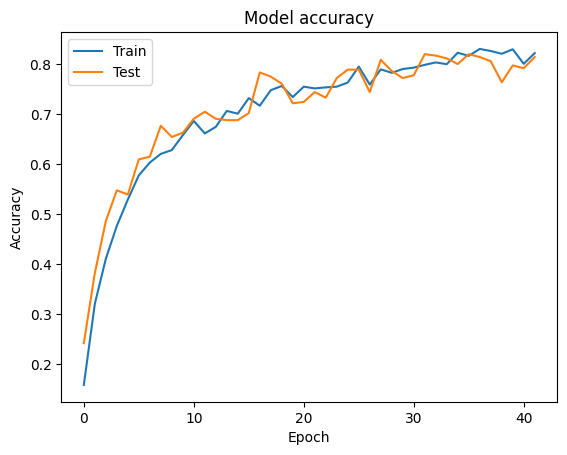

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

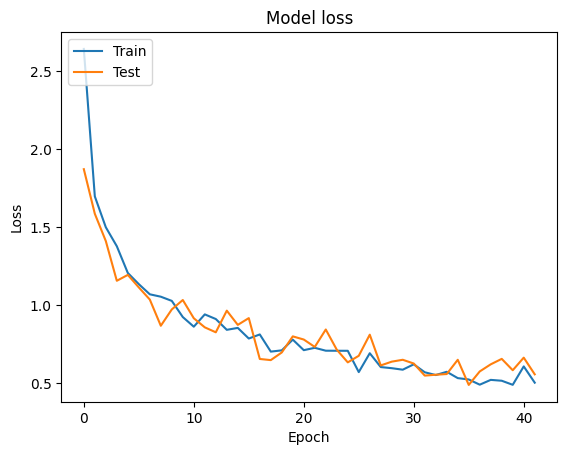

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 102ms/step
Predicted class: pins_Dominic Purcell


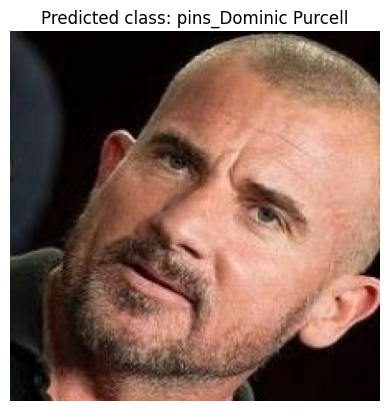

In [ ]:
image_path = '/content/drive/MyDrive/subset/pins_Dominic Purcell/Dominic Purcell123_916.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.resize(image, (224,224))
image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
predicted_class_index = np.argmax(prediction)
class_labels = train_data.class_indices
class_names = list(class_labels.keys())
predicted_class_name = class_names[predicted_class_index]
print(f"Predicted class: {predicted_class_name}")
plt.imshow(cv2.cvtColor(image[0],cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()

1/1 [==============================] - 0s 101ms/step
Predicted class: pins_Anne Hathaway


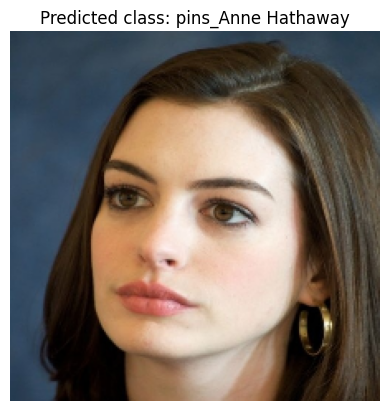

In [ ]:
image_path = '/content/drive/MyDrive/subset/pins_Anne Hathaway/Anne Hathaway169_356.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.resize(image, (224,224))
image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
predicted_class_index = np.argmax(prediction)
class_labels = train_data.class_indices
class_names = list(class_labels.keys())
predicted_class_name = class_names[predicted_class_index]
print(f"Predicted class: {predicted_class_name}")
plt.imshow(cv2.cvtColor(image[0],cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()

1/1 [==============================] - 0s 101ms/step
Predicted class: pins_Irina Shayk


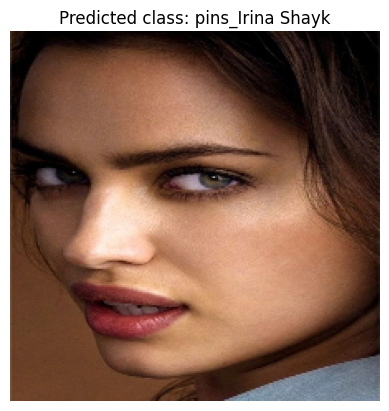

In [ ]:
image_path = '/content/drive/MyDrive/subset/pins_Irina Shayk/Irina Shayk130_2271.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.resize(image, (224,224))
image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
predicted_class_index = np.argmax(prediction)
class_labels = train_data.class_indices
class_names = list(class_labels.keys())
predicted_class_name = class_names[predicted_class_index]
print(f"Predicted class: {predicted_class_name}")
plt.imshow(cv2.cvtColor(image[0],cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/VGG.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/weights_vgg.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
